# Project "Computer game's webstore" (Проект "Интернет-магазин компьютерных игр")

The task of project to analyze historical data on game sales. Data obtained from open sources include game sales, user and expert evaluations, genres and platforms ( information for 2016 may be incomplete). The main purpose of the project is to identify the determining patterns of games success. 

Проект по анализу исторических данных о продажах игр. Данные получены из открытых источников, включают в себя продажи игр, оценки пользователей и экспертов, жанры и платформы ( информация за 2016 год может быть неполной). Цель проекта - выявить определяющие успешность игры закономерности. 

Project plan:
1. Data preparation
2. Exploratory data analysis
3. User's profile for earch region
4. Hypothesis testing:
       1) Average user ratings for Xbox One and PC platforms are the same
       2) Average user ratings of Action and Sports genres are different
5. General conclusion

План проекта:
1. Подготовка данных
2. Исследовательский анализ данных
3. Портрет пользователя для каждого региона
4. Проверка гипотез:
       1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
       2) Средние пользовательские рейтинги жанров Action и Sports разные
5. Общий вывод

# 1. Primary data analysis (Первичный анализ данных)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import warnings

import scipy
from scipy import stats as st

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('D:/Практикум-DS/Проекты для портфолио/games.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__Conclusion:__
In total, there are 16715 rows in the dataframe, some columns have missing data, some numeric data has 'object' type, the column names need to lead to a standard view - to translate to lower case.

__Вывод:__
Всего в датафрейме 16715 строк, в некоторых столбцах есть пропуски, часть числовых данных имеет тип 'object', названия столбцов нужно привести к стандартному виду - перевести в нижний регистр.

# 2. Preparation of the dataset for further analysis (Подготовка датасета к дальнейшему анализу)

## 2.1 Column name replacement (Замена названий столбцов)

In [3]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2.2 Missing data handling (Обработка пропусков)

In [4]:
print(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


It is not possible to fill in missing values in the 'name' column, it makes sense to remove them, especially if only two are missing.
We can also delete rows with blank cells in the 'year_of_release' column, because it is not possible to fill them in correctly and not much values are missing.

The missing data in the 'critic_score' and 'user_score' columns cannot be properly filled out, but these data will be used in further research, so it is better to leave them unhandled.

Заполнить пропуски в столбце 'name' невозможно, имеет смысл их удалить, тем более пропуска всего два.
Строки с пропусками в столбце 'year_of_release' также можно удалить, так как заполнить их корректно невозможно, и их также немного.
Пропуски в столбцах 'critic_score' и 'user_score' корректно заполнить невозможно, а так как эти данные будут использоваться в дальнейшем исследовании, то их лучше оставить незаполненными.


### The removal of rows with missing values in columns 'name' and 'year_of_release' (Удаление строк с пропусками в столбце 'name' и 'year_of_release')

In [5]:
data=data.dropna(subset=['name']).reset_index(drop=True)
data=data.dropna(subset=['year_of_release']).reset_index(drop=True)

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

### Imputation of missing values in column 'rating' (Заполнение пропусков в столбце 'rating')

In [6]:
# let's look at unique values in the column 'rating' (посмотрим на уникальные значения в столбце "рейтинг")
print(data['rating'].unique())
data['rating'].value_counts()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

The research of 'rating' field show us, that there are 4 ratings, that are very rare: 'AO','K-A', 'EC', 'RP'. We can just remove these rows.
The missing values we will fill in by 'N/A', so they won’t interfere with the calculations and  won’t distort the results of the research.

Изучение рейтингов показало, что в этом столбце есть 4 редко встречающихся значения: 'AO','K-A', 'EC', 'RP', их можно просто удалить. Пропуски заполним значением 'N/A' - так они не будут мешать рассчетам, но и не исказят результаты исследования.

In [7]:
data['rating']=data['rating'].fillna('N/A')
data = data[data['rating'].isin (['AO','K-A', 'EC', 'RP']) == False ]

data['rating'].value_counts()

N/A     6676
E       3921
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

In [8]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8451
user_score         6605
rating                0
dtype: int64

### 'user_score' column analysis (Анализ столбца 'user_score')

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In the 'user_score' column, mainly numeric values from 0 to 10, there are missing values that cannot be filled in without distorting the results. There is a 'tbd' value that can be interpreted as "not yet defined", that is, the user started to play, but the rating is not yet ready. For the convenience of researching data using this column, it is better to replace 'tbd' with 'nan' - it will not affect the result.

В столбце 'user_score' преимущественно числовые значения от 0 до 10, есть пропуски, которые невозможно заполнить, не исказив результаты. Есть значение 'tbd', которое можно интерпретировать, как "пока не определено", то есть пользователь начал играть, но оценку поставить еще не готов. Для удобства исследования данных с использованием данного столбца лучше заменить 'tbd' на 'nan' - на результате это никак не скажется.

In [10]:
data['user_score']=data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

### 'critic_score' column analysis (Изучение столбца 'critic_score')

In [11]:
np.sort(data['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In the 'critic_score' column, mainly numeric values from 0 to 100, there are missing values that cannot be filled in without distorting the results.

В столбце 'critic_score' преимущественно числовые значения от 0 до 100, есть пропуски, которые невозможно заполнить, не исказив результаты.

__Reasons for missing data:__  missing values might have appeared in the data for earlier periods, since the information was not collected then, and it was not possible to restore it later in full, the ratings could also be optional or not for all regions. The omissions in user and critic ratings are most likely due to the fact that the technical capability of evaluation was not available at the time. Some of the data may have been lost due to incorrect uploading of information (such as game name and genre).

__Причины пропусков:__ пропуски могли появится в данных за ранние периоды, так как тогда информация еще не собиралась, а восстановить ее позже в полном объеме не удалось, рейтинги тоже могли быть необязательными или проставлялись не для всех регионов. Пропуски в данных по оценкам пользователей и критиков скорее всего связаны с тем, что технической возможности оценки не было в тот момент. Часть данных могла быть утеряна в результате некорректной выгрузки информации (например название игры и жанр).

## 2.3 Data type change (Изменение типов данных)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16431 non-null  object 
 2   year_of_release  16431 non-null  float64
 3   genre            16431 non-null  object 
 4   na_sales         16431 non-null  float64
 5   eu_sales         16431 non-null  float64
 6   jp_sales         16431 non-null  float64
 7   other_sales      16431 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7457 non-null   object 
 10  rating           16431 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


First of all it makes sense to change the data type in the column 'year_of_release' - in reality it is integer, it can be obtained non-correct values when computing if we leave the type float. Also, in the 'user_score' column, the float type is better for calculations.

Прежде всего имеет смысл изменить тип данных в столбце 'year_of_release' - в реальности он целочисленный, могут получаться некорретные значения при вычислениях, если оставить тип float, а также в столбце 'user_score' - для вычислений будет лучше, если будет тип float.

In [13]:
data=data.astype({'year_of_release':'int64'})
data=data.astype({'user_score':'float64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16431 non-null  object 
 1   platform         16431 non-null  object 
 2   year_of_release  16431 non-null  int64  
 3   genre            16431 non-null  object 
 4   na_sales         16431 non-null  float64
 5   eu_sales         16431 non-null  float64
 6   jp_sales         16431 non-null  float64
 7   other_sales      16431 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7457 non-null   float64
 10  rating           16431 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 2.4 Calculaion total sales for all regions (Подсчет суммарных продаж по всем регионам)

In [14]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# 3. Exploratory data analysis (Исследовательский анализ данных)

## 3.1 Dynamics of game production in different years (Динамика выпуска игр в разные годы)

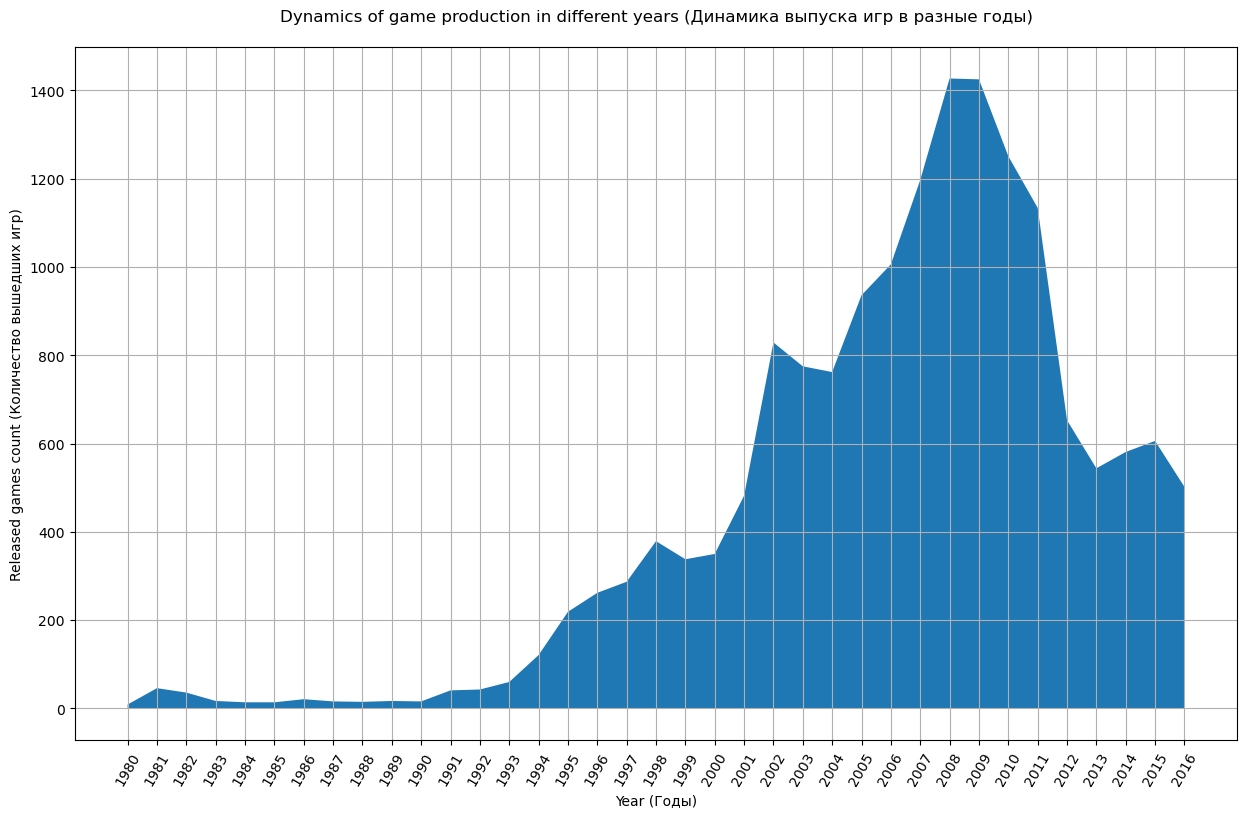

In [15]:
data_year=data.groupby('year_of_release').agg(games=('name', 'count')).reset_index()
plt.figure(figsize=(15, 9));
plt.grid();
plt.fill_between(data_year['year_of_release'], data_year['games']);
plt.xticks(np.arange(data_year['year_of_release'].min(), data_year['year_of_release'].max()+1, 1));
plt.xticks(rotation = 60);
plt.xlabel("Year (Годы)");
plt.ylabel("Released games count (Количество вышедших игр)");
plt.title('Dynamics of game production in different years (Динамика выпуска игр в разные годы)\n');

plt.show()

__Conclusion:__ Between 1980 and 2001, there were less than 500 games per year, which is not enough to draw any conclusions about these periods. Therefore, data from 2002 to 2016 could be used for further evaluation.

__Вывод:__ В период с 1980 по 2001 годы выходило менее 500 игр в год, что недостаточно для того, чтобы делать какие-то выводы об этих периодах. Поэтому можно для дальнейшей оценки использовать данные с 2002 по 2016 годы.

## 3.2 Dynamics of sales on all platforms (Динамика объемов продаж по всем платформам)

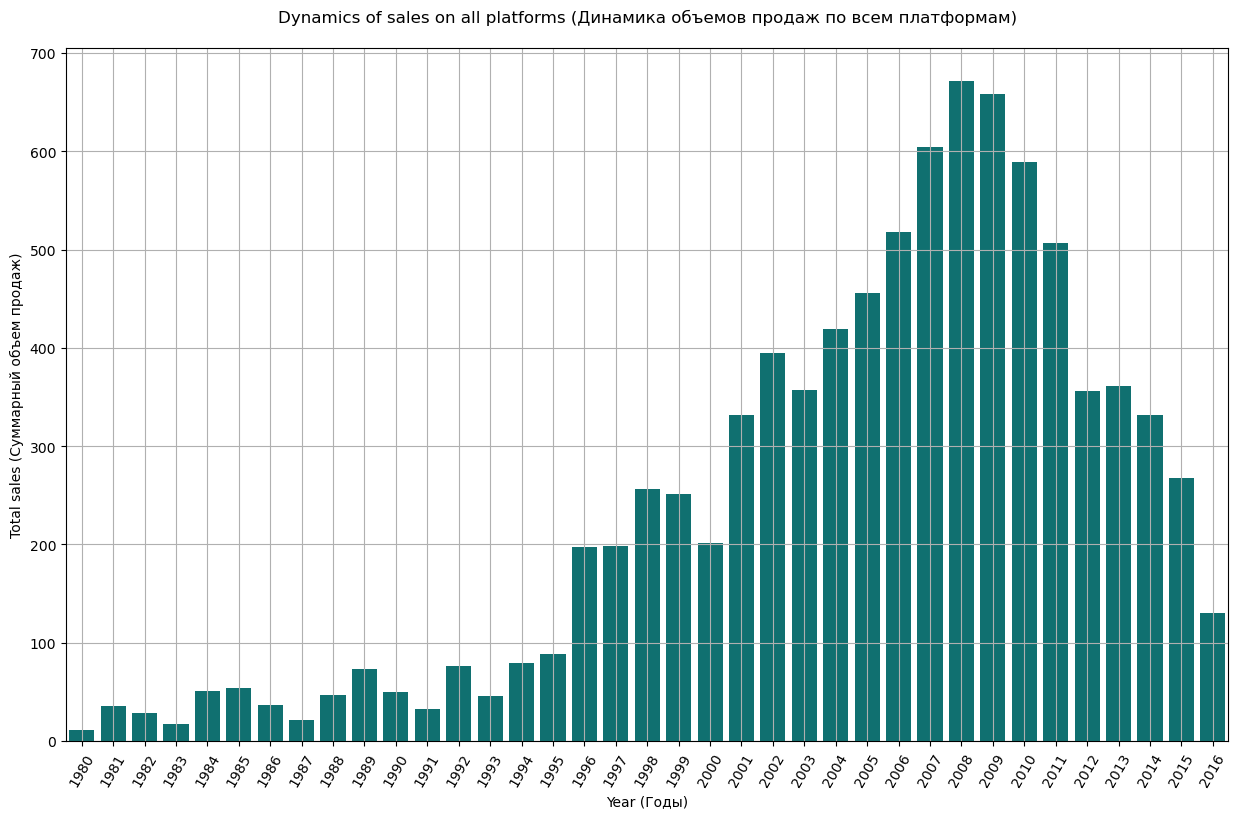

In [16]:
data_sales=data.groupby('year_of_release').agg(sales=('total_sales', 'sum')).reset_index()

plt.figure(figsize=(15, 9));
plt.title('Dynamics of sales on all platforms (Динамика объемов продаж по всем платформам)\n');
plt.xticks(np.arange(data_sales['year_of_release'].min(), data_sales['year_of_release'].max()+1, 1));
sns.barplot(data=data_sales, x='year_of_release', y='sales', color='teal');
plt.xticks(rotation = 60);
plt.xlabel("Year (Годы)");
plt.ylabel("Total sales (Суммарный объем продаж)");
plt.grid(True)
plt.show();

The graphics show that the increase in popularity of the games occurred in the mid-1990s, peaked in 2008-2009, then went down.

Let’s see, the platforms with the most sales.

По графику видно, что рост популярности игр пришелся на середину 90х, достиг пика в 2008-2009 годах, далее пошел спад.

Посмотрим, на платформы с наибольшим объемом продаж.

## 3.3 Annual distribution of sales by most successful platforms (Распределение продаж по годам по наиболее успешным платформам) 

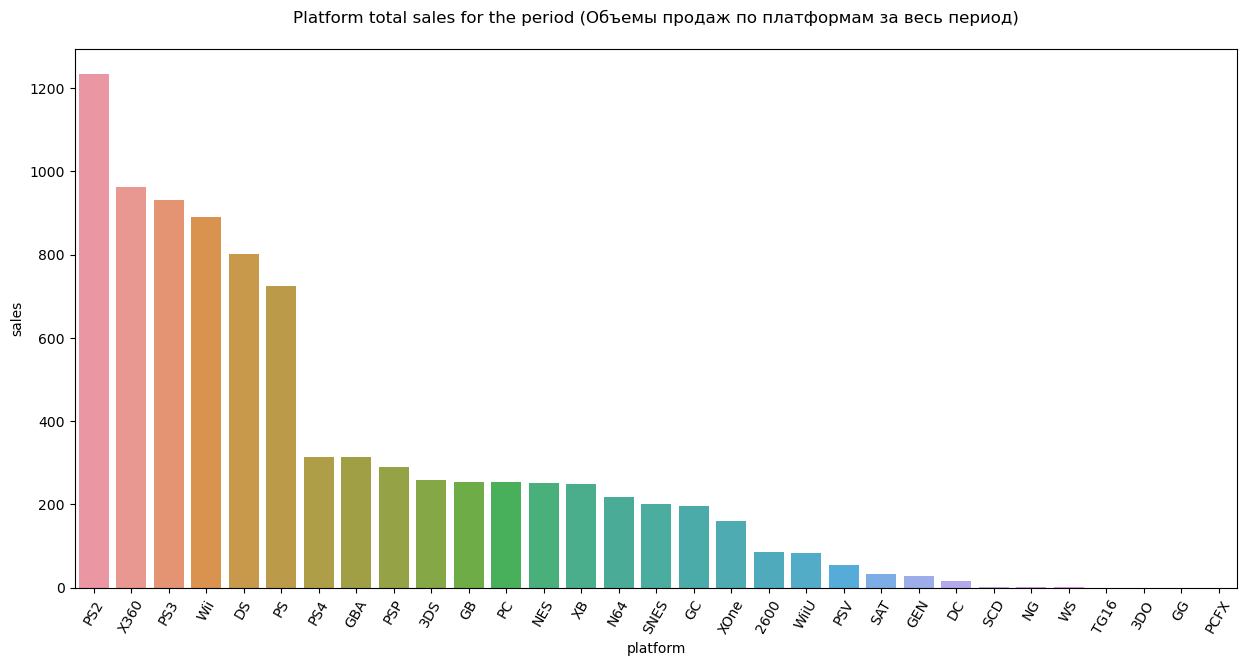

  platform    sales
0      PS2  1233.32
1     X360   961.24
2      PS3   931.34
3      Wii   890.52
4       DS   802.13
5       PS   725.67


In [17]:
data_platform_top=data.groupby('platform').agg(sales=('total_sales', 'sum')).\
                    sort_values(by='sales',ascending=False).reset_index()
plt.figure(figsize=(15, 7));
plt.xticks(rotation = 60);
sns.barplot(data=data_platform_top, x='platform', y='sales')
plt.title('Platform total sales for the period (Объемы продаж по платформам за весь период)\n')
plt.show();
data_platform_top=data_platform_top[:6]
print(data_platform_top)

For further analysis, we select 6 platforms with the largest total sales: PS2, X360, PS3, Wii, DS and PS.
Let's build graphs of sales dynamics by years.

Для дальнейшего анализа отберем 6 платформ с наибольшим объемом продаж: PS2, X360, PS3, Wii, DS и PS.
Построим по ним графики динамик продаж по годам.

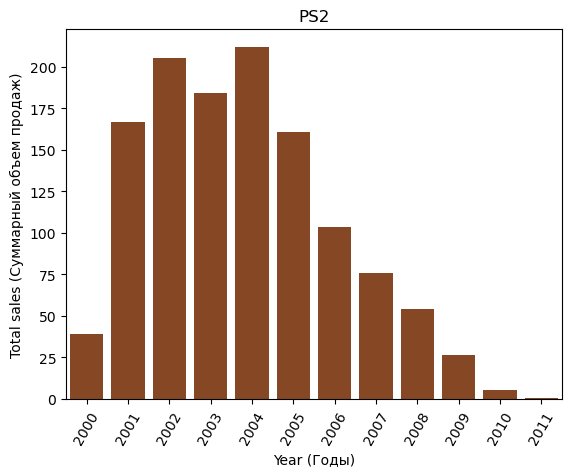

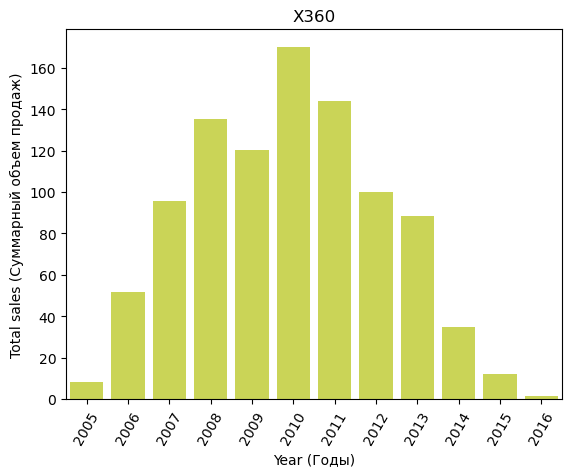

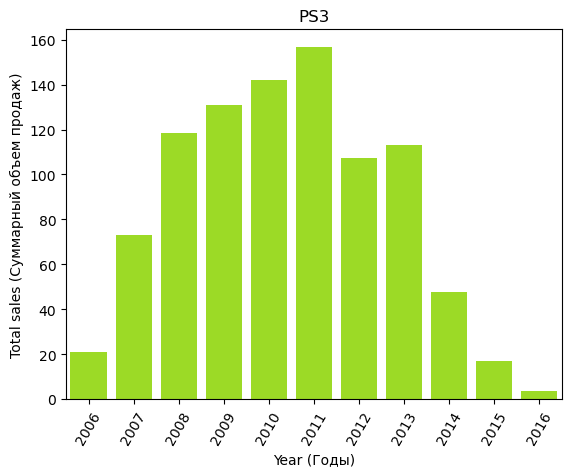

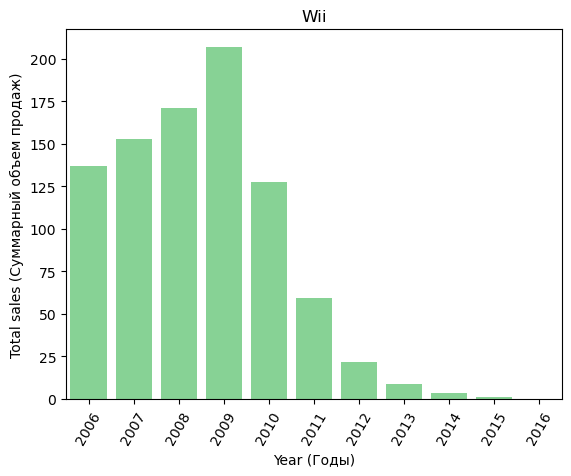

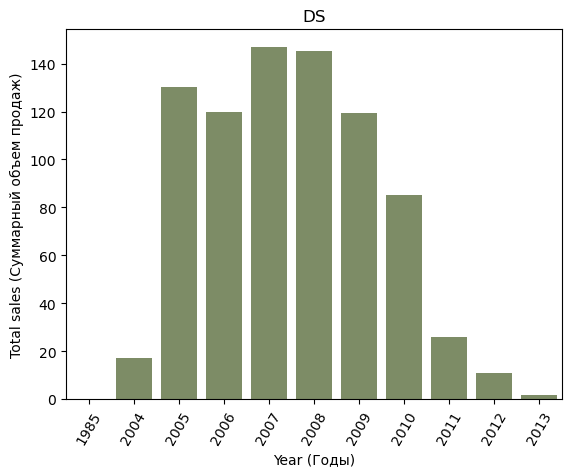

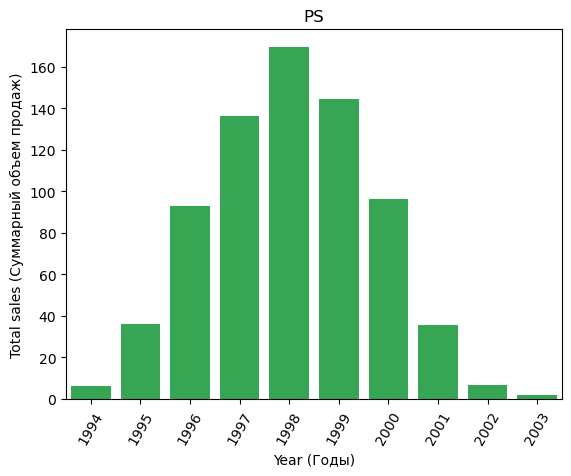

In [18]:
data_platform=data.groupby(['platform','year_of_release']).agg(sales=('total_sales', 'sum')).reset_index()

for platform in data_platform_top['platform'].unique():
    data_plat=data_platform[data_platform['platform'] == platform].drop('platform', axis=1)
    clr = '#'+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
    sns.barplot(data=data_plat, x='year_of_release', y='sales',color=clr)
    plt.title(platform)
    plt.xticks(rotation = 60);
    plt.xlabel("Year (Годы)");
    plt.ylabel("Total sales (Суммарный объем продаж)");
    plt.show();

According to sales trends for the most profitable platforms during the entire period under review, it is evident that the new platforms "live" about 10 years, and then replace the more modern.

__Conclusion:__ The task is researching data for the 2017 forecast, so it makes sense to take the data from the last 5 years so as not to miss the platform that has now peaked, but not to take into account the platforms that are already losing popularity.

По динамикам продаж для самых прибыльных платформ за весь наблюдаемый период видно, что новые платформы "живут" около 10 лет, а затем сменяются более современными.

__Вывод:__ Задача стоит провести исследование с целью прогноза на 2017 год, поэтому имеет смысл взять данные за последние 5 лет, чтобы не упустить платформу, которая сейчас достигла пика, но и не брать в расчет платформы, популярность которых уже сходит на нет.

## 3.4 Selection of several potentially profitable platforms (Выбор нескольких потенциально прибыльных платформ)

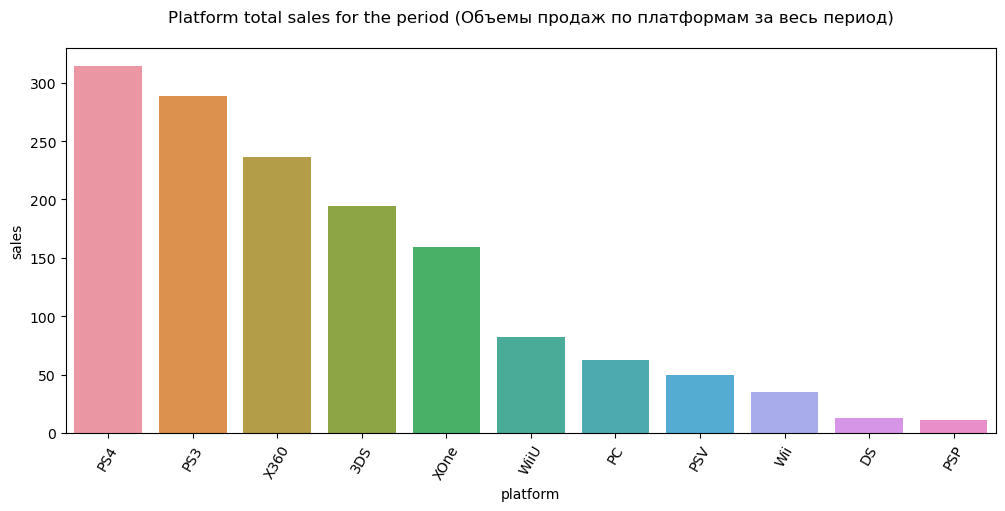

In [19]:
#let's leave only data for 2012-2016 (оставляем данныетолько за 2012-2016 годы)
data_new=data.query('year_of_release > 2011')

data_new_sales=data_new.groupby('platform').agg(sales=('total_sales', 'sum')).\
                sort_values(by='sales',ascending=False).reset_index()

plt.figure(figsize=(12, 5));
plt.xticks(rotation = 60);
sns.barplot(data=data_new_sales, x='platform',y='sales')
plt.title('Platform total sales for the period (Объемы продаж по платформам за весь период)\n')
plt.show();

The most promising at first glance seem to be the first 5 platforms: PS4, PS3, X360, 3DS, Xone. Let’s look at sales dynamics on all platforms, as some of them may have appeared recently and are still gaining popularity.

Наиболее перспективными на первый взгляд кажутся первые 5 платформ: PS4, PS3, X360, 3DS, Xone. Посмотрим подробнее на динамику продаж по всем платформам, так как некоторые из них могли появиться совсем недавно и еще только набирают популярность.

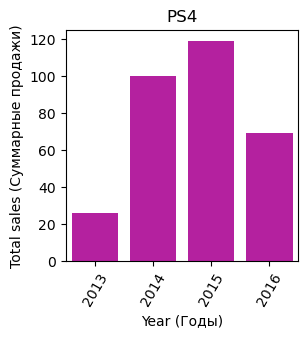

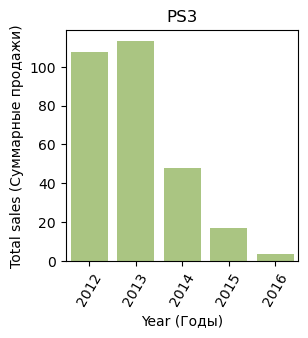

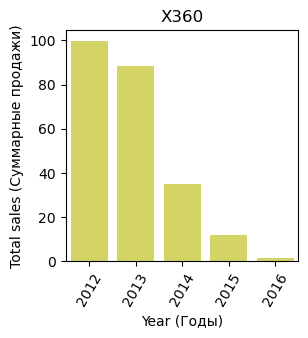

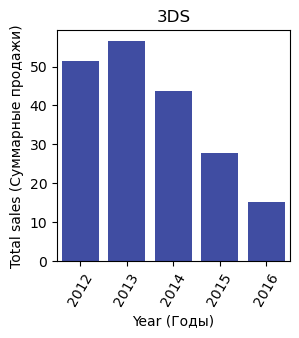

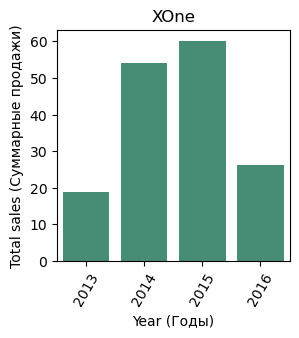

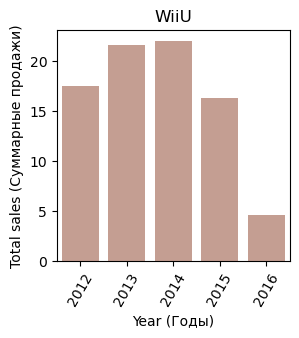

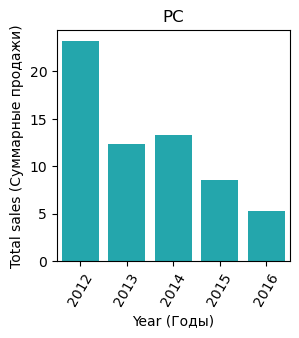

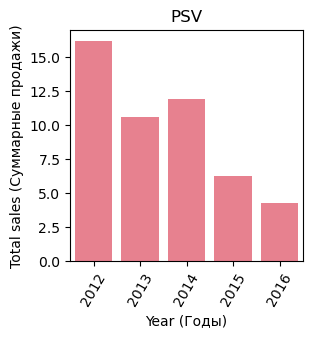

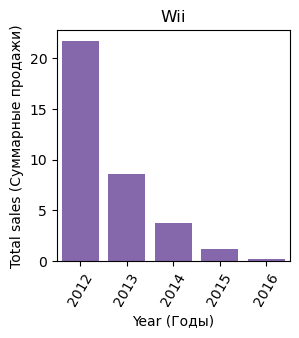

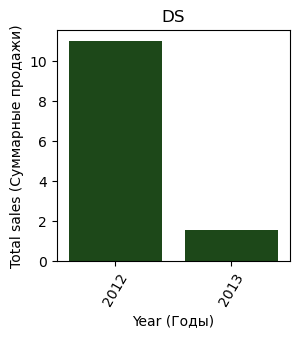

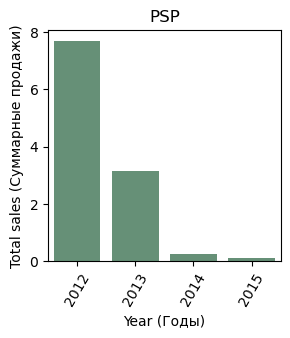

In [20]:
data_new_platform=data_new.groupby(['platform','year_of_release']).agg(sales=('total_sales', 'sum')).reset_index()
data_new_top=data_new_sales[:11]

for platform in data_new_top['platform'].unique():
    plt.figure(figsize=(3, 3));
    data_plat=data_new_platform[data_new_platform['platform'] == platform].drop('platform', axis=1)
    clr = '#'+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
    sns.barplot(data=data_plat, x='year_of_release', y='sales',color=clr);
    plt.title(platform)
    plt.xticks(rotation = 60);
    plt.xlabel("Year (Годы)");
    plt.ylabel("Total sales (Суммарные продажи)");
    plt.show();

Obviously, you can immediately discard the PSP and DS - sales over the last 2 years have been very little or not at all. A clear downward trend can be seen on the following platforms: Wii, X360, PS3.
A clear upward trend in sales, with incomplete data for 2016, is evident on the PS4 and XOne platforms, and for the other platforms, it seems more likely that the platform’s popularity has already surpassed its peak.

Очевидно, сразу можно отбросить PSP и DS - продаж за последние 2 года было очень мало или не было совсем. Явную тенденцию к снижению уровня продаж можно увидеть по платформам: Wii, X360, PS3.
Явная тенденция к росту продаж, с учетом неполных данных за 2016 год видна по платформам: PS4 и XOne, по остальным платформам больше похоже, что популярность платформы уже перевалила за пик.

## 3.5 Boxplot on global game sales by platforms ("Ящик с усами" по глобальным продажам игр в разбивке по платформам)

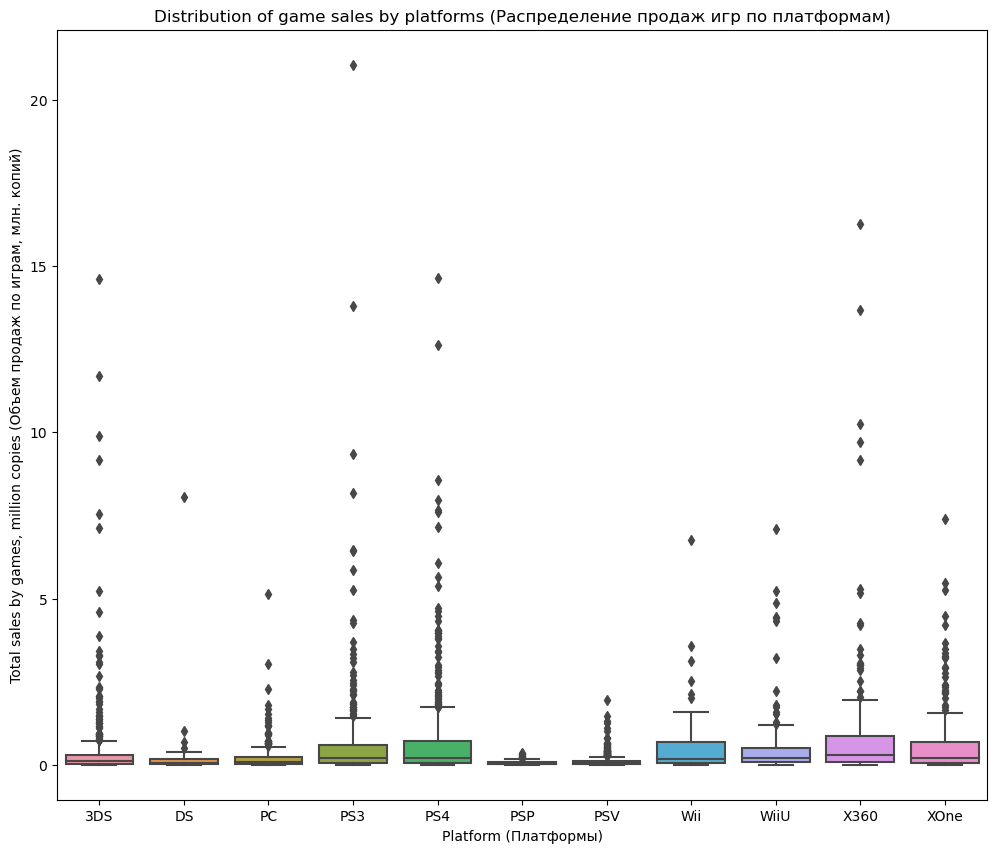

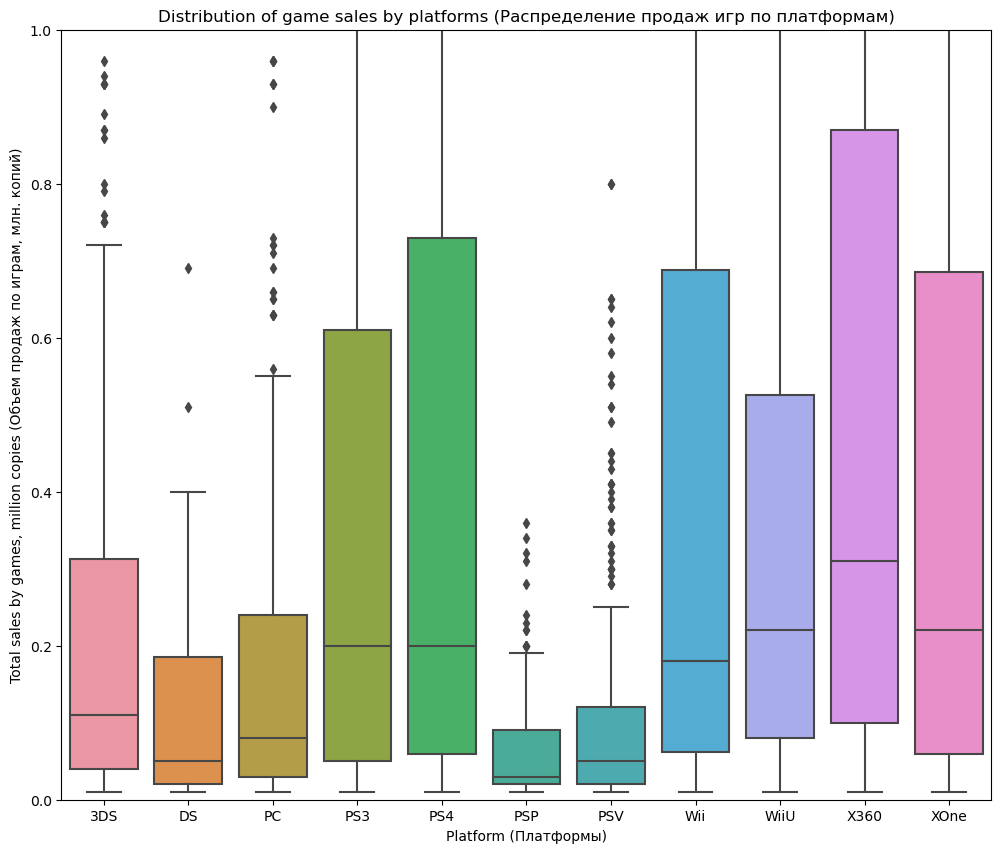

In [21]:
data_new.head()
data_platform_sales=data_new.groupby(['platform','name']).agg(sales=('total_sales','sum')).reset_index()
plt.figure(figsize=(12, 10));
sns.boxplot( x=data_platform_sales["platform"], y=data_platform_sales["sales"] )
plt.xlabel("Platform (Платформы)");
plt.ylabel("Total sales by games, million copies (Объем продаж по играм, млн. копий)");
plt.title('Distribution of game sales by platforms (Распределение продаж игр по платформам)')
plt.show();

plt.figure(figsize=(12, 10));
ax=sns.boxplot( x=data_platform_sales["platform"], y=data_platform_sales["sales"] )
ax.set(ylim=(0,1))
plt.xlabel("Platform (Платформы)");
plt.ylabel("Total sales by games, million copies (Объем продаж по играм, млн. копий)");
plt.title('Distribution of game sales by platforms (Распределение продаж игр по платформам)')
plt.show();

The conclusion is that on almost all platforms the distributions have a long tail that goes well beyond the whiskers - so there are rare very profitable games, the bulk of the games bring relatively little profit. The only exception is perhaps PSP and DS - here the whole distribution is very "pressed" to zero - relative to other platforms sales volumes are small and "hits" bring relatively low profits, which corresponds to the conclusion from the previous study: these platforms are already at the end of their life cycle.

According to the bottom of the charts the most profitable for the entire period under consideration is the X360 platform (the popularity of which according to the histogram of sales by years is already going down), also look promising PS4, XOne, relatively high sales (according to median value and the height of "box") have platforms PS3, Wii and WiiU. The rest of the platforms are well behind by both median sales and third quartile.

Вывод: почти по всем платформам у распределений длинный хвост, выходящий далеко за пределы усов - значит есть редкие очень прибыльные игры, основная же масса игр приносит относительно невысокую прибыль. Исключение составляет, пожалуй, только PSP и DS - тут все распределение очень "прижато" к нулю - относительно других платформ объемы продаж небольшие и "хиты" приносят относительно невысокую прибыль, что соответствует выводу из предыдущего исследования - эти платформы уже в конце своего жизненного цикла.

Судя по нижней части графиков наиболее прибыльной за весь рассматриваемый период является платформа X360 (популярность которой согласно гистограмме продаж по годам уже сходит на нет), так же выглядят перспективно PS4, XOne, относительно высокий уровень продаж (и по медиане, и по высоте самого "ящика") у платформ PS3, Wii и WiiU. Остальные платформы и по медианному уровню продаж, и по уровню 75% квантиля заметно отстают.

## 3.6 Influence on One platform sales of user and critic reviews. Scattering diagram and correlation between reviews and sales (Влияние на продажи платформы One отзывов пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами)

Correlation of global sales and critic's scores (Корреляция глобальных продаж и отзывов критиков): 0.42


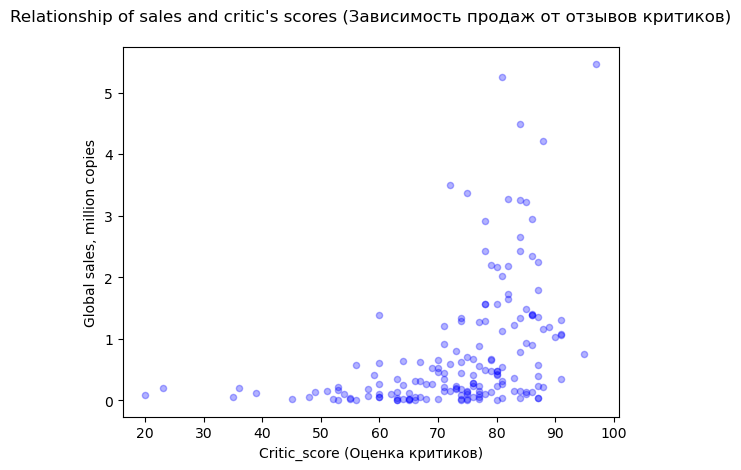


Correlation of global sales and user's scores (Корреляция глобальных продаж и отзывов пользователей): -0.07


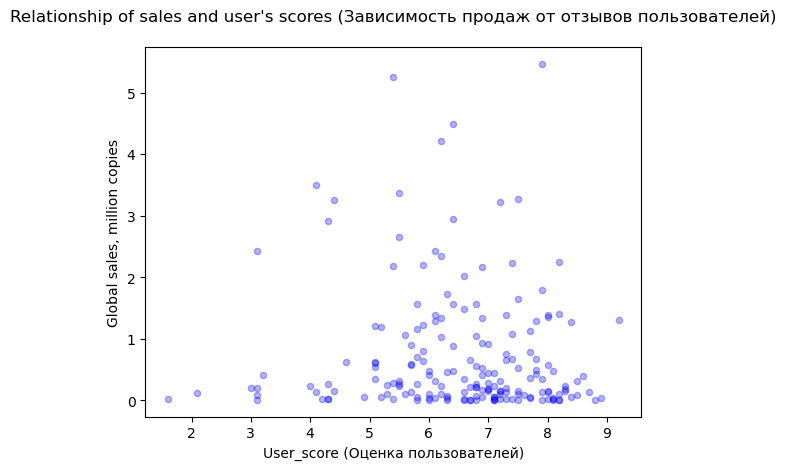

In [22]:
# datacut by platfotm XOne (делаем срез по платформе XOne)
data_one=data_new.query('platform == "XOne"')

# relationship of sales and critic_score (смотрим взаимосвязть продаж и оценок критиков)
print('Correlation of global sales and critic\'s scores (Корреляция глобальных продаж и отзывов критиков):', '{:.2f}'.format(data_one['total_sales'].\
                                                                          corr(data_one['critic_score'])))
data_one.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, c = 'b', s = 20);
plt.xlabel('Critic_score (Оценка критиков)'); 
plt.ylabel('Global sales, million copies');
plt.title('Relationship of sales and critic\'s scores (Зависимость продаж от отзывов критиков)\n');
plt.show();

# relationship of sales and user_score (смотрим взаимосвязть продаж и оценок пользователей)
print('\nCorrelation of global sales and user\'s scores (Корреляция глобальных продаж и отзывов пользователей):', '{:.2f}'.format(data_one['total_sales'].\
                                                                          corr(data_one['user_score'])))
data_one.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, c = 'b', s = 20);
plt.xlabel('User_score (Оценка пользователей)');
plt.ylabel('Global sales, million copies');
plt.title('Relationship of sales and user\'s scores (Зависимость продаж от отзывов пользователей)\n');

__Conclusion:__ no impact of user evaluation on sales was found, there is some correlation between sales and critic's score, but it isn't strong and linear. Combined with boxplot diagrams across all platforms and a more detailed evaluation of the Xone platform’s sales, the conclusion is that high sales are super-popular games are rare for any platform and appear to involve many factors besides user's and critic's scores.

__Вывод:__ не выявлено связи между глобальными продажами игр для платформы XOne и оценками пользователей, оценки критиков влияют на глобальные продажи в бОльшей степени, но и эту связь нельзя назвать сильной и однозначной.
В сумме оценка по диаграммам boxplot по всем платформам и более подробная оценка продаж платформы Xone позволяют сделать выводы, что высокие продажи супер-популярных игр редки для любой платформы и судя по всему на это вляет множество факторов помимо оценок пользователей и критиков как таковых.

Let’s see how the other platforms are doing, consider the correlation between critics/users' ratings and total sales across all platforms. Also look at the total number of evaluations for all platforms.

Посмотрим, как обстоят дела с остальными платформами, посчитаем корреляцию между оценками критиков/пользователей и суммарными продажами по всем платформам. Также посмотрим на общее количество оценок по всем платформам.

In [23]:
data_platform_user=data_new.groupby('platform')['user_score'].count()
data_platform_critic=data_new.groupby('platform')['critic_score'].count()
data_platform=data_new.groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr()

data_platform = data_platform.rename_axis(("platform", "corr_type"))
data_platform=data_platform.query('corr_type != "critic_score" & corr_type != "user_score"')
data_platform=data_platform.drop(['total_sales'],axis=1)
data_platform=data_platform.droplevel('corr_type')
data_platform=data_platform.rename(columns={'critic_score':'critic_corr', 'user_score':'user_corr'})

data_platform=data_platform.merge(data_platform_critic, on='platform',how='left')
data_platform=data_platform.merge(data_platform_user, on='platform',how='left')
data_platform=data_platform.rename(columns={'critic_score':'critic_count', 'user_score':'user_count'})

display(data_platform.style.format({'critic_corr':'{:.2f}','user_corr':'{:.2f}'}))

,critic_corr,user_corr,critic_count,user_count
platform,,,,
3DS,0.32,0.20,104,114
DS,nan,0.88,1,3
PC,0.24,-0.12,198,206
PS3,0.33,-0.01,214,283
PS4,0.41,-0.03,252,257
PSP,nan,-0.80,1,4
PSV,0.09,-0.00,107,130
Wii,-0.42,0.30,5,17
WiiU,0.35,0.40,90,100


All platforms show a low correlation of global sales with critics and users, with the exception of the DS platform: a correlation between sales and ratings 0.88 and the PSP platform: a correlation between sales and user ratings 0.8, but there are very few estimates for these platforms, so the correlation calculation cannot be considered correct.

Для всех платформ характерна невысокая корреляция глобальных продаж с оценками критиков и пользователей, исключение - платформа DS: корреляция между продажами и оценкой пользователей 0.88 и платформа PSP: корреляция между продажами и оценкой пользователей 0.8, но по этим платформам крайне мало оценок, так что расчет корреляции нельзя считать корретным.

## 3.7 General distribution of games by genre. The most profitable genres. Genres with high and low sales (Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами).

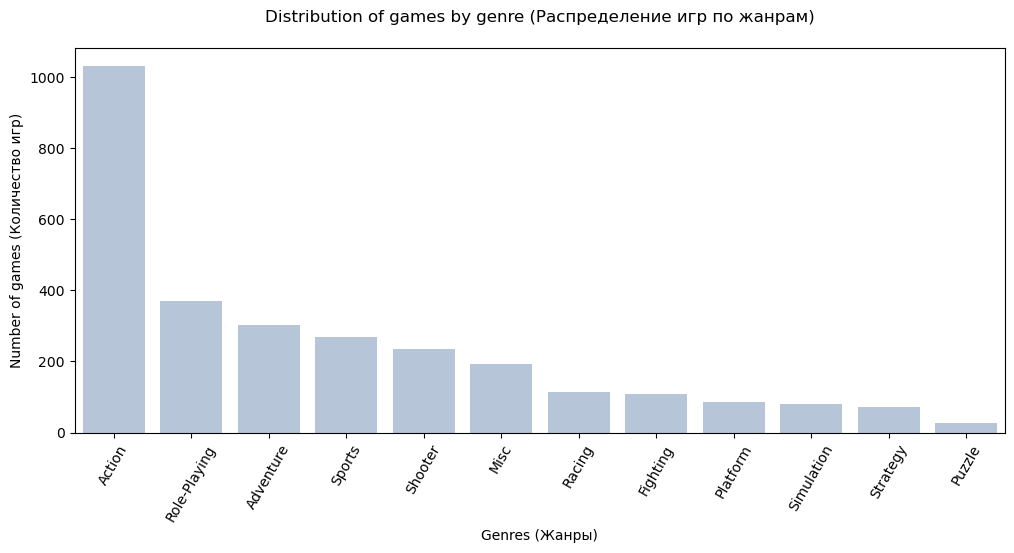

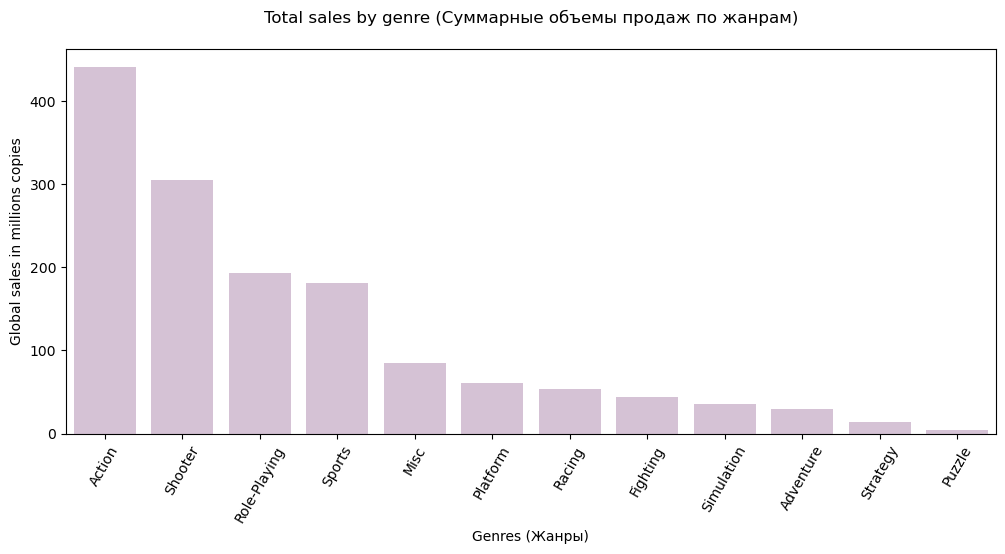

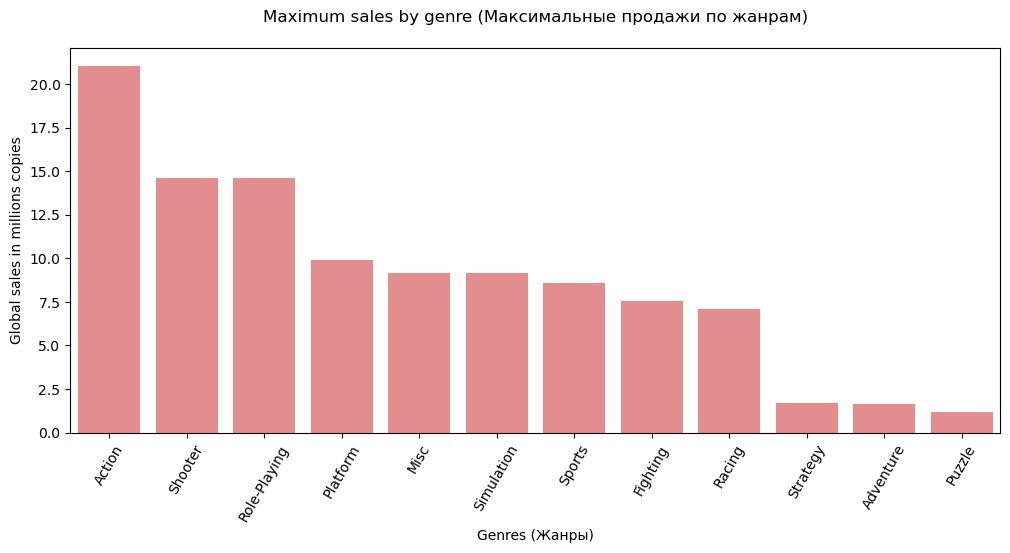

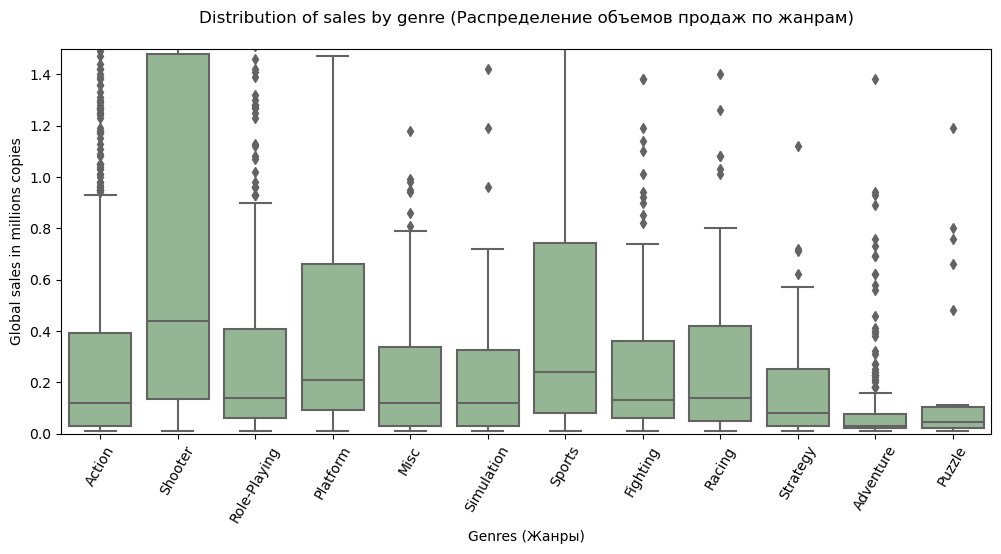

In [24]:
func_list=['count','sum','max']
title_list=['Distribution of games by genre (Распределение игр по жанрам)\n',\
            'Total sales by genre (Суммарные объемы продаж по жанрам)\n',\
            'Maximum sales by genre (Максимальные продажи по жанрам)\n']
y_title=['Number of games (Количество игр)', 'Global sales in millions copies', 'Global sales in millions copies']
color_list=['lightsteelblue','thistle','lightcoral']
for i in range(3):
    data_genre=data_new.groupby('genre')['total_sales'].agg(func_list[i]).reset_index().sort_values('total_sales', \
                                                                                                    ascending=False)
    plt.figure(figsize=(12, 5));
    sns.barplot(x=data_genre['genre'], y=data_genre['total_sales'], color=color_list[i])
    plt.xlabel('Genres (Жанры)');
    plt.ylabel(y_title[i]);
    plt.title(title_list[i]);
    plt.xticks(rotation = 60);
    plt.show();

data_genre=data_new.groupby('genre')['total_sales'].median().reset_index().sort_values('total_sales', ascending=False)
plt.figure(figsize=(12, 5));
ax=sns.boxplot(x=data_new['genre'], y=data_new['total_sales'], color='darkseagreen')
ax.set(ylim=(0,1.5))
plt.xlabel('Genres (Жанры)');
plt.ylabel('Global sales in millions copies');
plt.title('Distribution of sales by genre (Распределение объемов продаж по жанрам)\n');
plt.xticks(rotation = 60);
plt.show();

__Conclusion:__ Among all genres, Action has the absolute lead in the number of games released - over 1,000 games between 2012 and 2016, in Role-Playing, Adventure, Sports, Shooter and Misc genres have been released from 200 to 400 games in the period under review,  in other genres - less than 100 games.

Obveously, the genre Action leads in total sales, but if you look at the average (median) values, the leaders will be quite different: Shooter genre leads with a large margin ahead of other genres (more than 400 thousand. copies), on the second place is Sports and Platform ( 200 to 250 thousand. copies), Puzzle and Adventure have the lowest levels.

__Вывод:__ Среди всех жанров безусловное лидерство по количеству выпускаемых игр занимает Action - более 1000 игр за период с 2012 по 2016 год, в жарнрах Role-Playing, Adventure, Sports, Shooter и Misc за рассматриваемый период вышло от 200 до 400 игр приблизительно, в остальных жанрах - менее 100 игр.

Естесственно жанр Action лидирует по суммарным объемам продаж, но если посмотреть средние (медианные) значения, то лидеры будут совсем другие: с большим отрывом опережая другие жанры лидирует Shooter (более 400 тыс. копий), далее идут Sports и Platform ( от 200 до 250 тыс. копий), самые низкие показатели у жанров Puzzle и Adventure.

# 4. User profile for each region (Портрет пользователя каждого региона)

The task is to define for the each region (North America, Europe, Japan): most popular platforms (top 5), most popular genres (top 5), find out if the ESRB rating affects a region sales.

Задача - определить для каждого региона (North America, Europe, Japan): cамые популярные платформы (топ-5), самые популярные жанры (топ-5), выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

## 4.1 The most popular platforms (top 5) (Топ-5 популярных платформ)

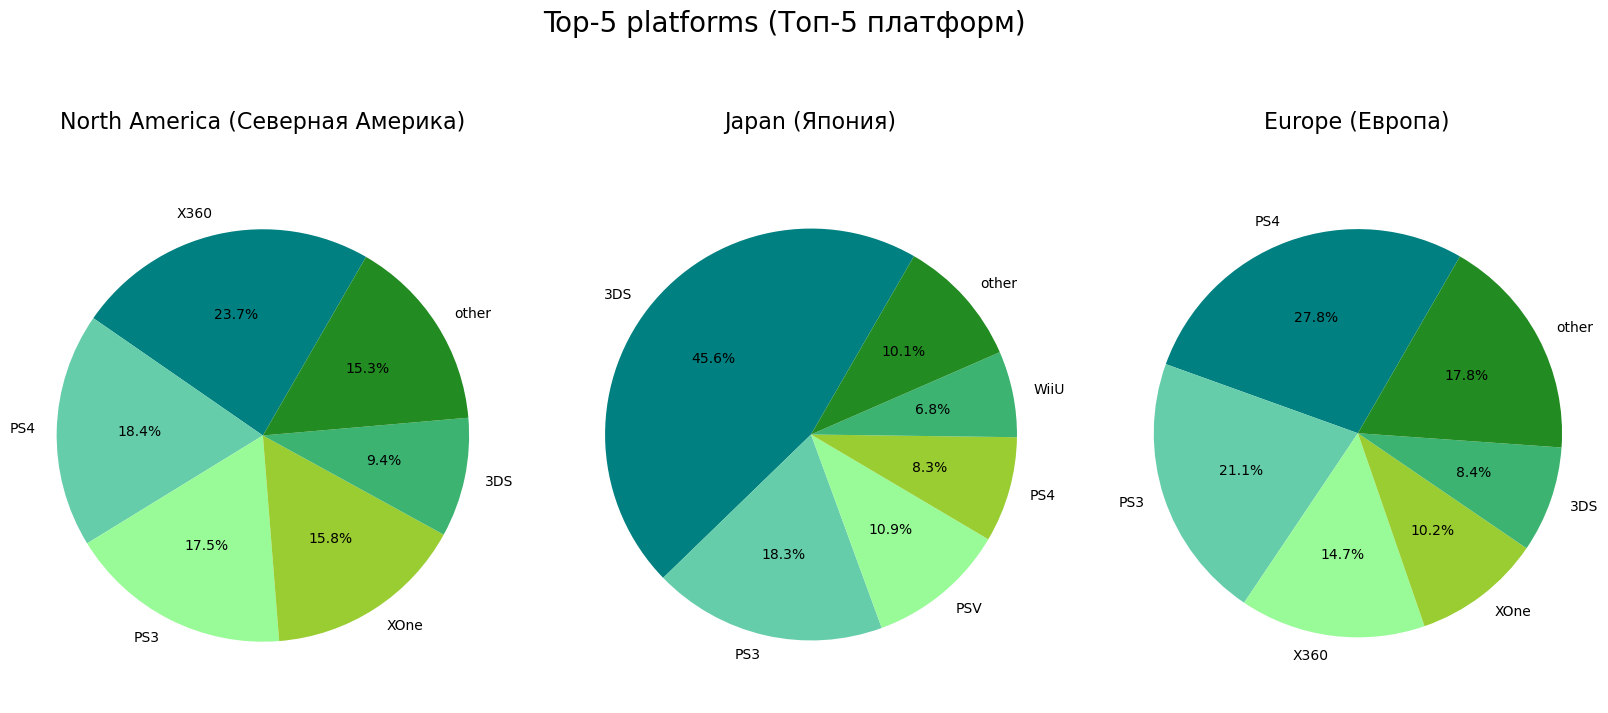

In [25]:
fig, ax= plt.subplots(1,3, figsize =(20, 7));
plt.suptitle('Top-5 platforms (Топ-5 платформ)\n', y=1.1, fontsize=20)
subtitle_list=['North America (Северная Америка)\n', 'Japan (Япония)\n', 'Europe (Европа)\n']
col_region_list=['na_sales', 'jp_sales', 'eu_sales']

for i in range(3):
    data_temp=data_new.groupby('platform')[col_region_list[i]].sum().reset_index().\
                                sort_values(col_region_list[i], ascending=False).reset_index(drop=True)
    data_temp=data_temp.append({'platform':'other',col_region_list[i]: sum(data_temp.loc[5:10,col_region_list[i]])}, \
                           ignore_index=True).drop(index=[5,6,7,8,9,10])
    colors = ("teal", "mediumaquamarine","palegreen","yellowgreen","mediumseagreen","forestgreen")
    ax[i].pie(data_temp[col_region_list[i]], labels=data_temp['platform'],autopct='%1.1f%%', colors=colors, startangle=60);
    ax[i].axis('equal');
    ax[i].set_title(subtitle_list[i], fontsize=16);

plt.show();


For North America, Japan, and Europe, the top 5 platforms differ, while for America and Europe the top three are the same, and differ only shares (X360, PS4, PS3), Japan is characterized by other platforms, X360 and Xone do not fall in the top5, but 3DS in volume is approaching half of all sales.

Для Северной Америки, Японии и Европы топ-5 платформ отличаются, причем если для Америки и Европы тройка наиболее популярных одна и та же, а отличаются только доли (X360, PS4,PS3), то для Японии характерны другие платформы, X360 и Xone вообще не попадают в топ-5, зато 3DS по объемам приближается к половине всех продаж.

## 4.2 The most popular genres (top 5) (Топ-5 популярных жанров)

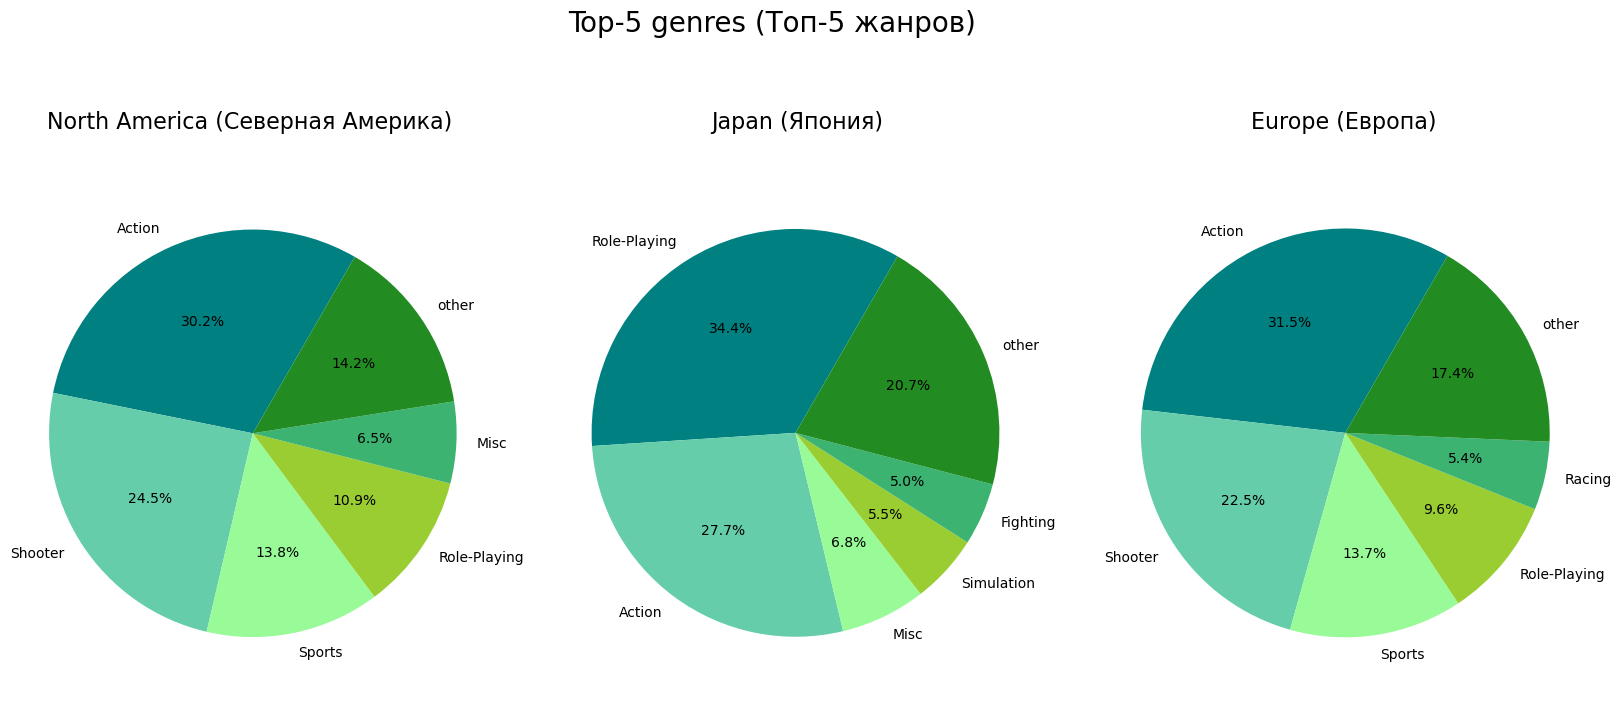

In [26]:
fig, ax= plt.subplots(1,3, figsize =(20, 7));
plt.suptitle('Top-5 genres (Топ-5 жанров)\n', y=1.1, fontsize=20)

subtitle_list=['North America (Северная Америка)\n', 'Japan (Япония)\n', 'Europe (Европа)\n']
col_region_list=['na_sales', 'jp_sales', 'eu_sales']

for i in range(3):
    data_temp=data_new.groupby('genre')[col_region_list[i]].sum().reset_index().\
                                sort_values(col_region_list[i], ascending=False).reset_index(drop=True)
    data_temp=data_temp.append({'genre':'other',col_region_list[i]: sum(data_temp.loc[5:10,col_region_list[i]])}, \
                           ignore_index=True).drop(index=[5,6,7,8,9,10,11])
    colors = ("teal", "mediumaquamarine","palegreen","yellowgreen","mediumseagreen","forestgreen")
    ax[i].pie(data_temp[col_region_list[i]], labels=data_temp['genre'],autopct='%1.1f%%', colors=colors, startangle=60);
    ax[i].axis('equal');
    ax[i].set_title(subtitle_list[i], fontsize=16);

plt.show();


Situation in the top 5 genres is similar to the top 5 platforms: North America and Europe are very similar in genres and genre's shares of market, but there is only one intersection in top-3 in all three region it's Action genre.
In general, Japanese gamers exhibit greater homogeneity - the two most popular genres: Role-Playing and Action occupy a total of more than 62% of the market, the rest - less than 10% each. North America and Europe also have three leaders in genres (Action, Shooter, and Sports), but the shares of genres that are not in the top 3 are larger.

В топ-5 жанров похожая на топ-5 платформ ситуация: Северная Америка и Европа очень близки и по самим жанрам и по долям, а вот Япония пересекается в топ-3 только по жанру Action - он примерно одинаково популярен во всех трех регионах. В целом Японские потребители демонстрируют бОльшую однородность - два наиболее популярных жанра: Role-Playing и Action занимаются суммарно более 62% рынка, остальные жанры - менее 10% каждый. В Северной Америке и Европе тоже есть безусловные лидеры по жанрам (Action, Shooter и Sports), но доли жанров, не входящих в топ3 побольше.

## 4.3 Impact of ESRB rating on sales in different regions (Влияние рейтинга ESRB на продажи в разных регионах)

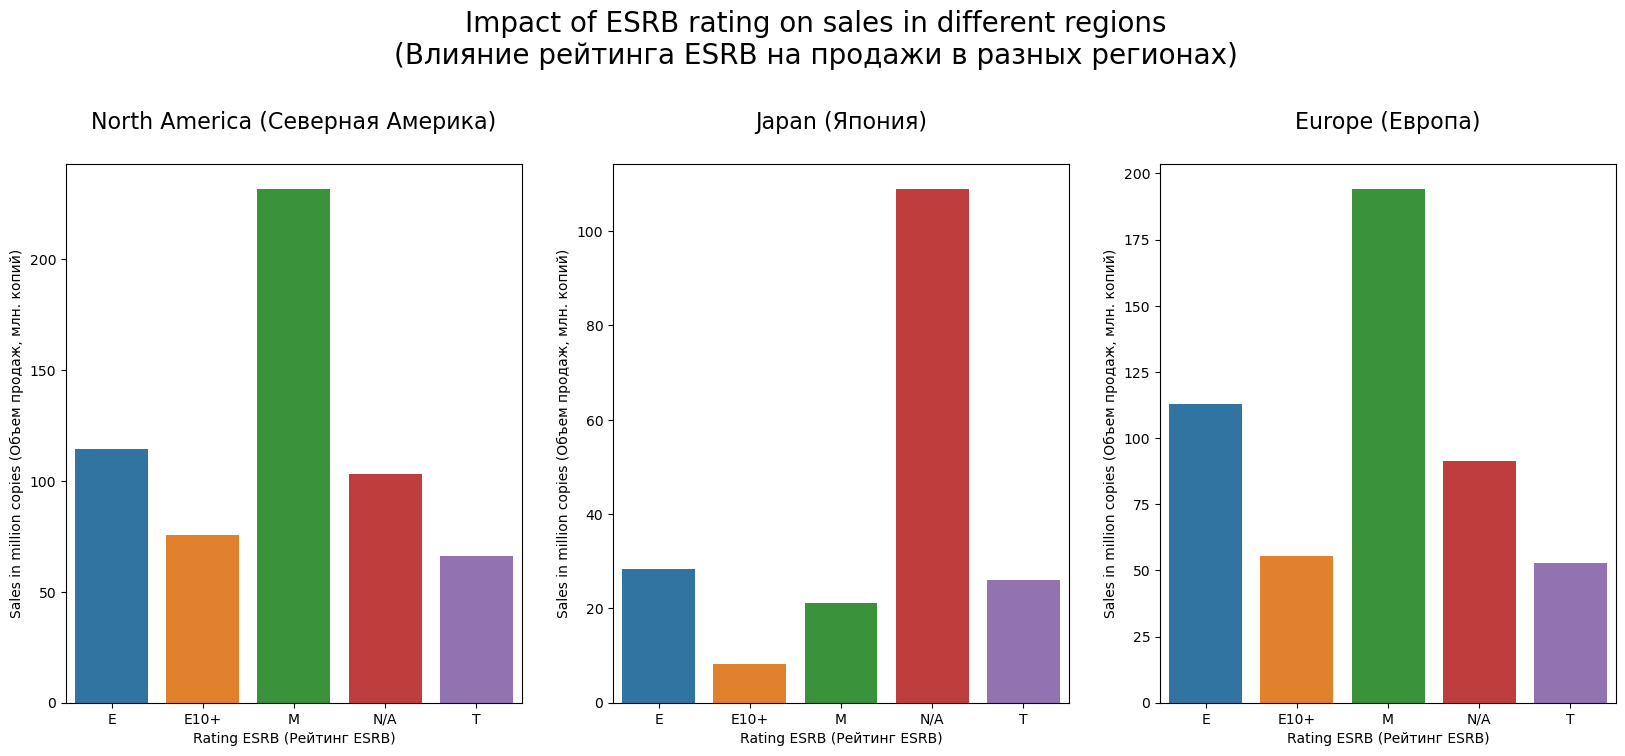

In [27]:
fig, ax= plt.subplots(1,3, figsize =(20, 7));
plt.suptitle('Impact of ESRB rating on sales in different regions\n(Влияние рейтинга ESRB на продажи в разных регионах)', \
             y=1.1, fontsize=20)
title_list=['North America (Северная Америка)\n', 'Japan (Япония)\n', 'Europe (Европа)\n']
column_list=['na_sales', 'jp_sales', 'eu_sales']
data_esrb=data_new.groupby('rating')['na_sales','jp_sales','eu_sales'].sum().reset_index()

for i in range (3):
    sns.barplot(data=data_esrb,x='rating',y=column_list[i],ax=ax[i])
    ax[i].set_xlabel('Rating ESRB (Рейтинг ESRB)');
    ax[i].set_ylabel('Sales in million copies (Объем продаж, млн. копий)');
    ax[i].set_title(title_list[i], fontsize=16); 
plt.show();

__Conclusion:__ Large market share of computer games in America and Europe corresponds to "M" and "E" raitings - only for adults over 17 years and for users 6 years and older, which seems to correspond to "adult" and "children" games, seemingly rating "E10+" and "T" and are used less often, because most games can be attributed to one of the first two age categories.
As we see in Japan, ESRB ratings are not actively used (ESRB was initially focused on products for the North American market), so the impact on sales is difficult to assess.

__Вывод:__ большая часть продаж в Северной Америке и Европе приходится на игры с рейтингом "M" и "E"- только для взрослых старше 17 лет и для пользователей от 6 лет и старше, что по всей видимости соответствует "взрослым" и "детским" играм, по всей видимсти рейтинги "E10+" и "T" и используются реже, т.к. бОльшинство игр можно отнести к одной из первых двух возрастных категорий.
В Японии по всей видимости рейтинги ESRB  активно не используются (изначально ESRB ориентировалась на продукты для североамериканского рынка), поэтому и влияние на продажи сложно оценить.

# 5. Hypothesis testing (Проверка гипотез)

## 5.1 Average user ratings for Xbox One and PC platforms are the same (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые)

__Null hypothesis H0__: The average user rating of the Xbox One platform is equal to the average user rating of the PC platform.

__Alternative Hypothesis H1__: The average user rating of the Xbox One platform is not equal to the average user rating of the PC platform.

Set the threshold value __alpha=0.05__.

__Нулевая гипотеза H0__: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

__Альтернативная гипотеза H1__: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Зададим пороговое значение __alpha=0.05__.

In [28]:
data_xone=data_new.query('platform == "XOne"')['user_score'].dropna()
data_pc=data_new.query('platform == "PC"')['user_score'].dropna()

print("\nXbox One sample size (Размер выборки по Xbox One):", len(data_xone))
print("PC sample size (Размер выборки по PC):", len(data_pc), "\n\n")

alpha = .05 # significance level (критический уровень статистической значимости)

results =scipy.stats.ttest_ind(data_xone, data_pc, equal_var=False)

print('p-value (p-значение):', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis and accept the alternative hypothesis \
    (Отвергаем нулевую гипотезу и принимаем альтернативную)\n")
else:
    print("Accept the null hypothesis (Принимаем нулевую гипотезу)\n") 


Xbox One sample size (Размер выборки по Xbox One): 182
PC sample size (Размер выборки по PC): 206 


p-value (p-значение): 0.5489537965134912
Accept the null hypothesis (Принимаем нулевую гипотезу)



__For  the hypothesis testing we used  t-test to test the equality of the mean two population. The sizes of samples from general populations are not equal, so equal_var=False.__

__The p-value is greater than the critical level of 5%, so we cannot reject the null hypothesis, i.e. the average user estimates for the Xbox One and PC platforms are equal with the probability of 95 percent.__

Для проверки гипотезы использовался t-тест для проверки равенства средних двух генеральных совокупностей. Размеры выборок из генеральных совокупностей не равны, поэтому equal_var=False.

Значение p-value больше критического уровня в 5%, поэтому нельзя отвергнуть нулевую гипотезу, т.е. средние пользовательские оценки для платформ Xbox One и PC равны с вероятностью 95%.


## 5.2 Average user ratings of Action and Sports genres are different (Средние пользовательские рейтинги жанров Action  и Sports разные)

__Null hypothesis H0__: The average user rating of the Action genre is equal to the average user rating of the Sport genre.

__Alternative Hypothesis H1__: The average user rating of the Action genre is not equal to the average user rating of the Sport genre.

Set the threshold value __alpha=0.05__.

__Нулевая гипотеза H0__: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

__Альтернативная гипотеза H1__: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Зададим пороговое значение __alpha=0.05__.

In [29]:
data_action=data_new.query('genre == "Action"')['user_score'].dropna()
data_sports=data_new.query('genre == "Sports"')['user_score'].dropna()

print("\nAction genre sample size (Размер выборки по жанру Action):", len(data_action))
print("Sport genre sample size (Размер выборки по жанру Sports):", len(data_sports), "\n\n")

alpha = .05 # критический уровень статистической значимости

results =scipy.stats.ttest_ind(data_action, data_sports, equal_var=False)

print('p-value (p-значение):', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis and accept the alternative hypothesis\
    (Отвергаем нулевую гипотезу и принимаем альтернативную)\n")
else:
    print("Accept the null hypothesis (Принимаем нулевую гипотезу)\n") 


Action genre sample size (Размер выборки по жанру Action): 523
Sport genre sample size (Размер выборки по жанру Sports): 195 


p-value (p-значение): 4.24307776572644e-20
Reject the null hypothesis and accept the alternative hypothesis    (Отвергаем нулевую гипотезу и принимаем альтернативную)



__For  the hypothesis testing we used  t-test to test the equality of the mean two population. The sizes of samples from general populations are not equal, so equal_var=False.__

__The p-value is less than the critical level of 5%, so we can reject the null hypothesis, i.e. the average user estimates for the Xbox One and PC platforms are not equal with the probability of 95 percent.__

Для проверки гипотезы использовался t-тест для проверки равенства средних двух генеральных совокупностей. Размеры выборок из генеральных совокупностей не равны, поэтому equal_var=False.

Значение p-value меньше критического уровня в 5%, поэтому можно отвергнуть нулевую гипотезу, т.е. средние пользовательские оценки для жанров Action и Sports не равны с вероятностью 95%.




# 6.0 General conclusion (Общий вывод)

1.  An analysis of the games released during the period under review showed that in the 1980s and early 1990s, the games market had only just begun to develop, a sharp increase in the number of released games occurred in the mid-1990s and continued until 2008-2009, when it reached its peak, from then until the end of the observed period, there has been a decrease.
2. The dynamics of games's sales on all platforms and all regions in general repeats the dynamics of the of games release: the more games - the sales.
3. A superficial analysis of the distribution of platforms sales over the period revealed several leaders, but a more detailed review revealed that some of these platforms are no longer in demand, and their period of excess profits was 5-10 years ago, however they are still leading in total sales for the entire observed period, because of global decrease in thу game market. The top 6 most profitable platforms analysis showed that the average "lifecircle" of the platform is about 10 years, so for further selection of perspective platforms it was decided to leave the data for the past 5 years, so as not to take into account those platforms for which sales have almost disappeared.
4. Further analysis of current platforms from 2012 to 2016 revealed two most promising platforms : PS4 and XBox One.
5. Analysis of the global sales distribution by platform showed that most platforms have rare super-popular games, the bulk of games brings relatively few sales. The exception - platforms whose life cycle is already ending - there are no single super profitable games. Also, the analysis of sales distribution by platforms confirmed the conclusions of the previous paragraph - the most promising platforms are the PS4 and Xbox One.
6. The attempt to identify the relationship between global sales and critics/users evaluations was unsuccessful, is likely to be a complex relationship and, in general, sales are heavily influenced by other factors (for example, the release of a movie about the game provokes interest in it, the presence of previous popular versions of the game also probably increases the chances of high sales).
7. The release of games in different genres is unevenly distributed - with a big gap leads the genre of Action, it is curious that this is not the most profitable "in average" genre, although due to the large number of released games and the popularity of individual games in the total sales of Action also leads. If you look at median values, the most promising  genres are: Shooter, Sports, Platform.
8. Analysis of the different regions user’s profile revealed that average users from North America and Europe are very similar, but users from Japan have significant differences: both in the choice of platforms and in the selection of genres. Common in the top 3 is again the genre of Action and the PS3 platform. The most popular games in Japan aren't ranked by ESBR , because the organization is focused on the North American market, and it is impossible to estimate the impact of ESBR raiting on sales in Japan. For North America and Europe characterized by high sales of "adults" games with M-rating and "children" games (from 6 years) with a E-rating.
9. The hypothesis "Average user ratings of Xbox One and PC platforms are the same" was accepted with a 95% probability. The hypothesis "Average user ratings of the genres Action and Sports are different" on the data for the last 5 years has also not been refuted.
10. When planning the release of a new game in the global market, should tto take into account all the findings should bear in mind that the most profitable in the last 5 years (at the beginning of 2017) is the genre of Shooting, it makes sense to release the game for the PS4 and Xbox One platforms, and the game should be focused on adult players. The same conclusions will be correct for the European and North American markets. If the game is to be released only for the Japanese market, a more detailed research of the profitability of genres is needed, as gamers in Japan differ markedly from gamers in Europe and North America.


1.  Анализ выпущенных за рассматриваемый период игр показал, что в 80ые и начале 90ых рынок игр только начал развиваться, резкий рост количества выпускаемых игр пришелся на середину 90х и продолжался до 2008-2009 годов, когда и достиг своего пика, с тех пор и до конца наблюдаемого периода наблюдается снижение.
2. Динамика объемов проданных копий по всем платформам и всем регионам в целом повторяет динамику выпуска игр: чем больше игр - тем больше их покупают.
3. Поверхностный анализ распределения объемов продаж по платформам за весь период выявил несколько лидеров, но при более подробном рассмотрении стало ясно, что часть этих платформ уже давно не востребованы, и их период сверхприбылей был 5-10 лет назад, тем не менее из-за общего спада на рынке игр они все еще лидируют по суммарным продажам за весь наблюдаемый период. Анализ топ-6 самых прибыльных платформ показал, что среднее "время жизни" платформы около 10 лет, поэтому для дальнейшего выбора перспективных платформ решено было оставить данные за последние 5 лет, чтобы не учитывать те платформы, по которым продажи уже почти сошли на нет.
4. Дальшейший анализ платформ актуальных с 2012 по 2016 годы позволил выявить 2 наиболее перспективные платформы : PS4 и XBox One.
5. Анализ распределения глобальных продаж с разбивкой по платформам показал, что для большинства платформ свойственны редкие супер-популярные игры, основная же масса приносит относительно немного покупок. Исключение - платформы, жизненный цикл которых уже завершается - там единичных сверхприбыльных игр уже нет. Также анализ распределния продаж по платформам подтвердил выводы предыдущего пункта - наиболее перспективными платформами являются PS4 и Xbox One.
6. Попытка выявить взаимосвязь между глобальными продажами и оценками критиков/пользователей не увенчалась успехом, скорее всего эта связь носит непростой характер, и в целом на продажи существенно влияют еще и другие факторы (например, выход фильма по игре провоцирует интерес к ней, наличие предыдущих популярных версий игры тоже наверняка повышает шансы на высокие продажи).
7. Выпуск игр в различных жанрах распределен неравномерно - c большим отрывом лидирует жанр Action, любопытно что при этом это не самый прибыльный "в среднем" жанр, хотя засчет большого количество выпускаемых игр и сверхпопулярности отдельных игр по суммарным продажам Action тоже лидирует. Если смотреть медианные значения, то наиболее перспективными являются жанры: Shooter, Sports, Platform.
8. Анализ "портрета" пользователя из разных регионов выявил, что среднестатистические пользователи из Северной Америки и Европы очень похожи, а вот пользователи из Японии имеют существенные отличия: и в выборе платформ, и в выборе жанров. Общим в топ-3 является опять же жанр Action и платформа PS3. Рейтинг ESRB не проставлен у большинства игр популярных в Японии, т.к. организация ориентирована на североамериканский рынок, и оценить влияние на объем продаж в Японии невозможно. Для Северной Америки и Европы характерны высокие продажи "взрослых" с рейтингом M и "детских" (от 6 лет) с рейтингом E игр
9. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" потвердилась с вероятностью 95%. Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" на данных за последние 5 лет также не была опровергнута.
10. При планировании выпуска новой игры на глобальном рынке с учетом всех полученных выводов стоит иметь ввиду, что наиболее прибыльным за последние 5 лет (на начало 2017 года) является жанр Shooting, имеет смысл выпускать игру для платформ PS4 и Xbox One, и игра должна быть ориентированной на взрослых игроков. Эти же выводы будут корректны для европейского и северо-американского рынка. Если же планируется выпуск игры только для рынка Японии - необходимо провести более детальное исследование прибыльности отдельных жанров, так как игроки в Японии заметно отличаются по своим предпочтениям от игроков в Европе и Северной Америке.